# Assignment No : 01

## Aim : Analyzing Sales Data from Multiple File Formats

*Name: Kanaka Amin | Class : BE | Roll No : 42501*

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/ffzs/dataset/refs/heads/master/sales.csv')

In [3]:
data.head()

,USERID,ORDERDATE,ORDERID,AMOUNTINFO
0,142074,2016-01-01,4196439032,9399.0
1,56927,2016-01-01,4198324983,8799.0
2,87058,2016-01-01,4191287379,6899.0
3,136104,2016-01-01,4198508313,5999.0
4,117831,2016-01-01,4202238313,5399.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86135 entries, 0 to 86134
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   USERID      86135 non-null  int64  
 1   ORDERDATE   86133 non-null  object 
 2   ORDERID     86135 non-null  int64  
 3   AMOUNTINFO  86127 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.6+ MB


## Checking for missing values

In [5]:
data.isnull().sum()

,0
USERID,0
ORDERDATE,2
ORDERID,0
AMOUNTINFO,8


In [6]:
data.dropna(inplace=True)

In [7]:
data.isnull().sum()

,0
USERID,0
ORDERDATE,0
ORDERID,0
AMOUNTINFO,0


In [8]:
data = data.drop_duplicates()

In [9]:
# Convert ORDERDATE to datetime format
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'])

In [10]:
data.head()

,USERID,ORDERDATE,ORDERID,AMOUNTINFO
0,142074,2016-01-01,4196439032,9399.0
1,56927,2016-01-01,4198324983,8799.0
2,87058,2016-01-01,4191287379,6899.0
3,136104,2016-01-01,4198508313,5999.0
4,117831,2016-01-01,4202238313,5399.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86125 entries, 0 to 86134
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   USERID      86125 non-null  int64         
 1   ORDERDATE   86125 non-null  datetime64[ns]
 2   ORDERID     86125 non-null  int64         
 3   AMOUNTINFO  86125 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.3 MB


In [12]:
# Extract year from ORDERDATE
data['ORDER_YEAR'] = data['ORDERDATE'].dt.year

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86125 entries, 0 to 86134
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   USERID      86125 non-null  int64         
 1   ORDERDATE   86125 non-null  datetime64[ns]
 2   ORDERID     86125 non-null  int64         
 3   AMOUNTINFO  86125 non-null  float64       
 4   ORDER_YEAR  86125 non-null  int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(2)
memory usage: 3.6 MB


In [ ]:
data.head()

,USERID,ORDERDATE,ORDERID,AMOUNTINFO,ORDER_YEAR
0,142074,2016-01-01,4196439032,9399.0,2016
1,56927,2016-01-01,4198324983,8799.0,2016
2,87058,2016-01-01,4191287379,6899.0,2016
3,136104,2016-01-01,4198508313,5999.0,2016
4,117831,2016-01-01,4202238313,5399.0,2016


In [ ]:
# Calculate total sales amount
total_sales = data['AMOUNTINFO'].sum()
print(f'Total Sales Amount: {total_sales}')

Total Sales Amount: 64139033.699999996


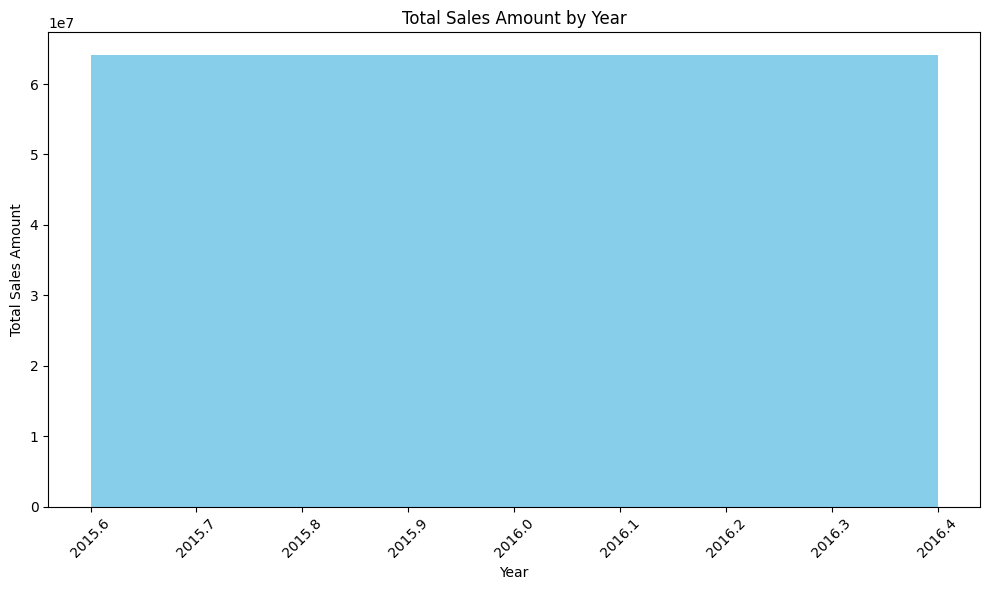

In [ ]:
import matplotlib.pyplot as plt

# Group by ORDER_YEAR and sum AMOUNTINFO
data = data.groupby('ORDER_YEAR')['AMOUNTINFO'].sum().reset_index()

# Create a bar plot for sales by year
plt.figure(figsize=(10, 6))
plt.bar(data['ORDER_YEAR'], data['AMOUNTINFO'], color='skyblue')
plt.title('Total Sales Amount by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

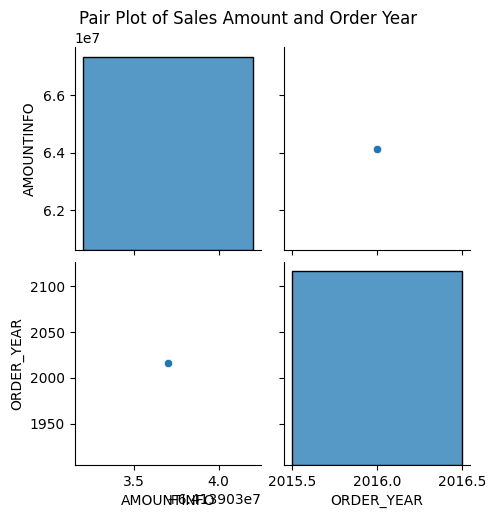

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming sales_data_cleaned is your cleaned DataFrame

# Create a pair plot
sns.pairplot(data, vars=['AMOUNTINFO', 'ORDER_YEAR'], kind='scatter')

# Show the plot
plt.suptitle('Pair Plot of Sales Amount and Order Year', y=1.02)  # Adjust title position
plt.show()
